## Cleaning the Data

Now that we have our data we will clean it in order to analyze it and plot it later on. 

In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("/Users/ironhackberlin/Desktop/dataTokenAdvance.csv")

***removing the x's*** ***and replacing the 0's to NaN***

In [2]:
dataset['token_return'] = dataset['token_return'].str.replace('x','')
dataset['eth_return'] = dataset['eth_return'].str.replace('x','')
dataset['btc_return'] = dataset['btc_return'].str.replace('x','')
dataset['token/eth_return'] = dataset['token/eth_return'].str.replace('x','')
dataset['token/btc_return'] = dataset['token/btc_return'].str.replace('x','')
dataset = dataset.replace(0, np.nan)

***max display settings***

In [3]:
pd.set_option('display.max_rows', 49438)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
dataset.head()

,name,usd_raised,month,token_sale_price,current_token_price,token_return,eth_return,btc_return,token/eth_return,token/btc_return
0,Tezos,2.306073e+08,Jul 2017,0.470,2.494,5.31,0.57,1.78,9.35,2.99
1,Sirin Labs,1.578858e+08,Dec 2017,0.470,0.011,0.02,0.16,0.30,0.15,0.08
2,The Bancor Protocol,1.530000e+08,Jun 2017,3.857,1.572,0.41,0.30,1.58,1.38,0.26
3,Bankera,1.500000e+08,Feb 2018,0.015,0.002,0.11,0.14,0.40,0.80,0.28
4,QASH,1.081745e+08,Nov 2017,0.309,0.034,0.11,0.39,0.56,0.28,0.19


In [5]:
dataset.tail()

,name,usd_raised,month,token_sale_price,current_token_price,token_return,eth_return,btc_return,token/eth_return,token/btc_return
375,Beyond the Void,115500.00,Nov 2016,0.004,0.001,0.19,13.85,5.62,0.01,0.03
376,Tokes,81099.98,Jan 2017,0.125,0.051,0.40,12.34,5.04,0.03,0.08
377,Procommerce,77000.00,Feb 2017,0.027,NaN,0.00,7.73,3.55,0.00,0.00
378,Bolenum,18606.20,Aug 2017,0.724,0.006,0.01,0.40,0.97,0.02,0.01
379,Spectrecoin,15426.50,Jan 2017,0.001,0.085,105.29,11.56,4.60,9.10,22.89


In [6]:
print("Information of total number of non-empty columns")
print("-------------------------------------------------")
print(dataset.info(null_counts=True))

Information of total number of non-empty columns
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 380 non-null    object 
 1   usd_raised           380 non-null    float64
 2   month                380 non-null    object 
 3   token_sale_price     376 non-null    float64
 4   current_token_price  328 non-null    float64
 5   token_return         362 non-null    object 
 6   eth_return           378 non-null    object 
 7   btc_return           379 non-null    object 
 8   token/eth_return     364 non-null    object 
 9   token/btc_return     364 non-null    object 
dtypes: float64(3), object(7)
memory usage: 29.8+ KB
None


In [7]:
print('Rows {rows} in total and Columns {columns} in total'.format(rows=dataset.shape[0],columns=dataset.shape[1]))

Rows 380 in total and Columns 10 in total


In [8]:
print("Columns and their datatypes")
dataset.dtypes #.dtypes are used to display datatypes of each column

Columns and their datatypes


name                    object
usd_raised             float64
month                   object
token_sale_price       float64
current_token_price    float64
token_return            object
eth_return              object
btc_return              object
token/eth_return        object
token/btc_return        object
dtype: object

## Handling missing values

In [9]:
print("Frequency count of missing values")
dataset.apply(lambda X:sum(X.isnull())) 

Frequency count of missing values


name                    0
usd_raised              0
month                   0
token_sale_price        4
current_token_price    52
token_return           18
eth_return              2
btc_return              1
token/eth_return       16
token/btc_return       16
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

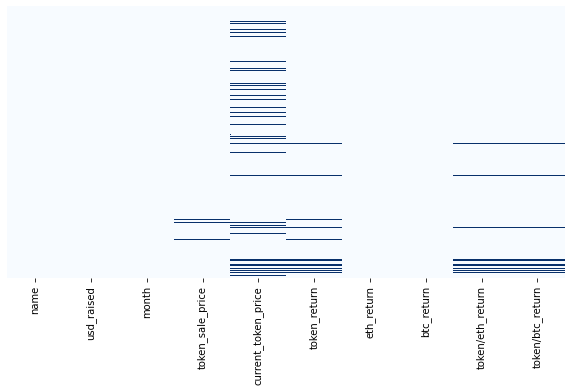

In [11]:
plt.figure(figsize=(10,5)) #plt is the object of matplot lib and .figure() is used to show or change properties of graphs
sns.heatmap(dataset.isnull(),cmap='Blues',yticklabels=False,cbar=False)#heatmaps are matrix plots which can visualize data in 2D
plt.show()

***As temp is a useless columns we delete it***

In [12]:
#del dataset['temp']

***Interpolation to predict missing values in each column and replacing***

Interpolated each columns ...

In [13]:
df = dataset.interpolate(method='linear', axis=0).ffill().bfill()

Now that our data is cleaned we can proceed to vizualisation and further analyse our dataset

In [14]:
df.describe()['usd_raised'].astype(int)

count          380
mean      20250746
std       23872533
min          15426
25%        5500000
50%       14770500
75%       26387269
max      230607346
Name: usd_raised, dtype: int64

In [15]:
print(df['name'].nunique())

380


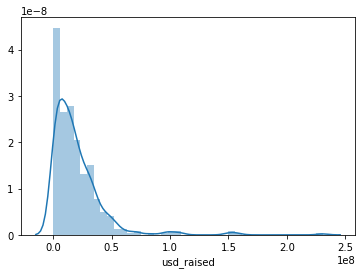

In [16]:
sns.distplot(df["usd_raised"])

## Top 10 startups had most funding

In [17]:
print("Skewness %f" % df["usd_raised"].skew())
print("Kurtosis %f" % df["usd_raised"].kurt())

Skewness 3.889428
Kurtosis 23.452806


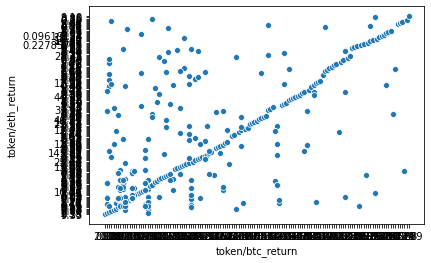

In [18]:
#scatter plot token b
sns.scatterplot(data = df, y = "token/eth_return", x = "token/btc_return");

***Analysis*** :
From the scatterplot above displaying the return for every token in either Ethereum(y) or Bitcoin (x) we can notice a linearity in most of the startups as well as dispersion for others.

***Top 6 by funds raised in $***

In [19]:
tp10fund= df.groupby('name')['usd_raised'].sum().sort_values(ascending=False)
tp10fund.head(3)

name
Tezos                  2.306073e+08
Sirin Labs             1.578858e+08
The Bancor Protocol    1.530000e+08
Name: usd_raised, dtype: float64

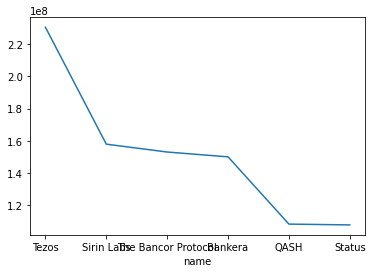

In [20]:
tp10fund.head(6).plot()

***Top 6 in terms of btc returns***

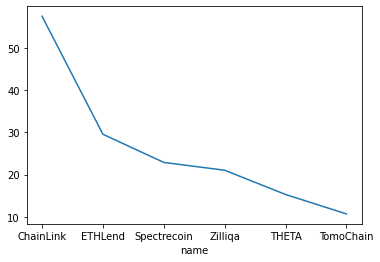

In [21]:
df2 = df
df2['token/btc_return'] = pd.to_numeric(df2['token/btc_return'])
tp10btc= df.groupby('name')['token/btc_return'].sum().sort_values(ascending=False)
tp10btc.head(6).plot()

***Top 6 in terms of eth returns***

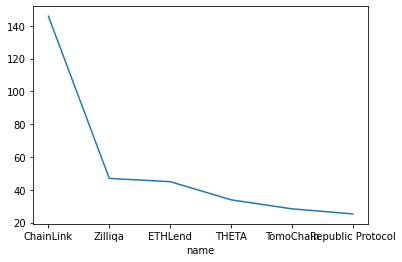

In [22]:
df2['token/eth_return'] = pd.to_numeric(df2['token/eth_return'])
top10eth = df.groupby('name')['token/eth_return'].sum().sort_values(ascending=False)
top10eth.head(6).plot()

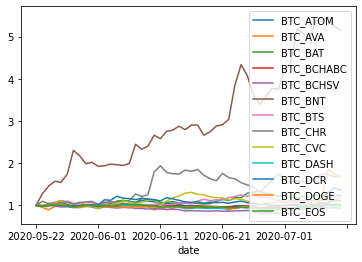

In [33]:
crypto_df = crypto_df.divide(crypto_df.iloc[0])
crypto_df.plot()

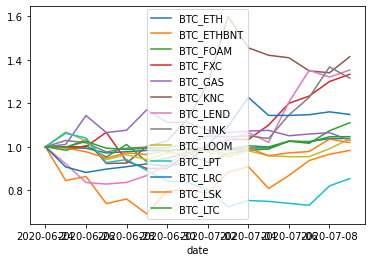

In [34]:
crypto_df1 = crypto_df2.divide(crypto_df2.iloc[0])
crypto_df1.plot()

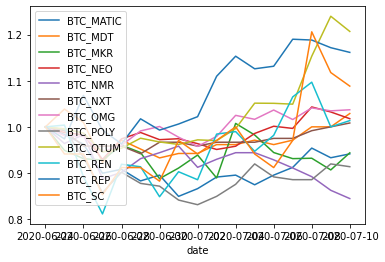

In [35]:
crypto_df2 = crypto_df3.divide(crypto_df3.iloc[0])
crypto_df2.plot()

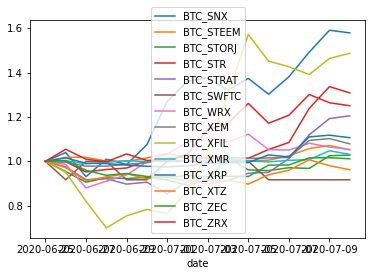

In [36]:
crypto_df3 = crypto_df4.divide(crypto_df4.iloc[0])
crypto_df3.plot()

-0.039531742060991464


Text(0, 0.5, 'BTC_BNT % Return')

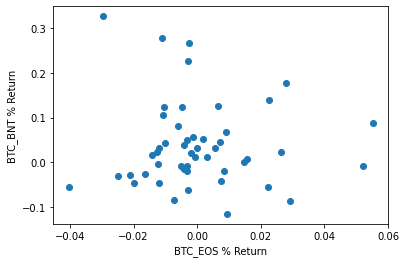

In [43]:
print(corr["BTC_EOS"]["BTC_BNT"])
plt.scatter(crypto_df_pct['BTC_EOS'],crypto_df_pct['BTC_BNT'])
plt.xlabel('BTC_EOS % Return')
plt.ylabel('BTC_BNT % Return')

0.7419611911367028


Text(0, 0.5, 'BTC_LTC % Return')

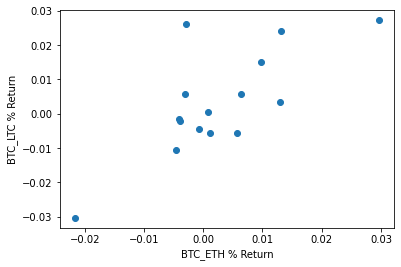

In [44]:
print(corr1["BTC_ETH"]["BTC_LTC"])
plt.scatter(crypto_df1_pct['BTC_ETH'],crypto_df1_pct['BTC_LTC'])
plt.xlabel('BTC_ETH % Return')
plt.ylabel('BTC_LTC % Return')

In [70]:
import statsmodels.api as sm
model = sm.OLS(crypto_df3_pct['BTC_XTZ'],
crypto_df3_pct['BTC_STR']).fit()
model.summary()

/Users/ironhackberlin/miniconda3/envs/boogie_woogie/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                BTC_XTZ   R-squared (uncentered):                   0.249
Model:                            OLS   Adj. R-squared (uncentered):              0.196
Method:                 Least Squares   F-statistic:                              4.651
Date:                Fri, 10 Jul 2020   Prob (F-statistic):                      0.0489
Time:                        05:30:15   Log-Likelihood:                          33.789
No. Observations:                  15   AIC:                                     -65.58
Df Residuals:                      14   BIC:                                     -64.87
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BTC_STR        0.3130      0.145      2.157      0.049       0.002       0.624
==============================================================================
Omnibus:                        0.628   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.730   Jarque-Bera (JB):                0.619
Skew:                          -0.183   Prob(JB):                        0.734
Kurtosis:                       2.074   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'BTC_STR % Return')

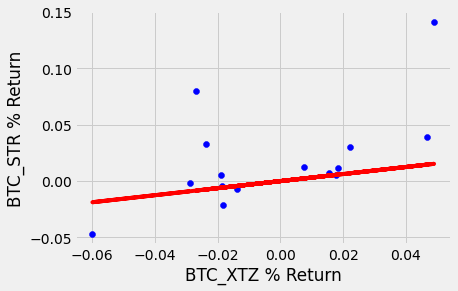

In [71]:
line=[model.params[0]*i for i in crypto_df3_pct['BTC_XTZ'].values]
plt.plot(crypto_df3_pct['BTC_XTZ'], line, c = 'r')
plt.scatter(crypto_df3_pct['BTC_XTZ'],crypto_df3_pct['BTC_STR'], color="blue")
plt.xlabel('BTC_XTZ % Return')
plt.ylabel('BTC_STR % Return')

In [72]:
data = pd.read_csv("/Users/ironhackberlin/Desktop/investments_VC.csv", encoding ='latin-1')

In [73]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data.rename(columns={' market ':'market','funding_total_usd':'usd_raised'},inplace=True)

In [75]:
data.head(10)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,/organization/club-domains,.Club Domains,http://nic.club/,|Software|,Software,"70,00,000",NaN,USA,FL,Ft. Lauderdale,Oakland Park,1.0,2011-10-10,2011-10,2011-Q4,2011.0,2013-05-31,2013-05-31,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0
6,/organization/fox-networks,.Fox Networks,http://www.dotfox.com,|Advertising|,Advertising,"49,12,393",closed,ARG,NaN,Buenos Aires,Buenos Aires,1.0,NaN,NaN,NaN,NaN,2007-01-16,2007-01-16,0.0,0.0,0.0,4912393.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,/organization/0-6-com,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,"20,00,000",operating,NaN,NaN,NaN,NaN,1.0,2007-01-01,2007-01,2007-Q1,2007.0,2008-03-19,2008-03-19,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1.0,2010-01-01,2010-01,2010-Q1,2010.0,2014-07-24,2014-07-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,/organization/01games-technology,01Games Technology,http://www.01games.hk/,|Games|,Games,"41,250",operating,HKG,NaN,Hong Kong,Hong Kong,1.0,NaN,NaN,NaN,NaN,2014-07-01,2014-07-01,41250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
data.dropna(how='all',inplace=True)

In [77]:
data_na=data.isna().mean().to_frame()
data_na[data_na[0]>0].style.background_gradient(cmap='Blues')

,0
name,0.000020
homepage_url,0.069764
category_list,0.080121
market,0.080262
status,0.026579
country_code,0.106659
state_code,0.389923
region,0.106659
city,0.123711
founded_at,0.220155


In [78]:
data.founded_year.describe()

count    38482.000000
mean      2007.359129
std          7.579203
min       1902.000000
25%       2006.000000
50%       2010.000000
75%       2012.000000
max       2014.000000
Name: founded_year, dtype: float64

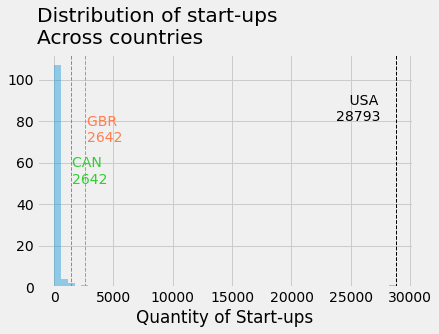

In [79]:
plt.style.use('fivethirtyeight')
sns.distplot(data.country_code.value_counts(),kde=False)
plt.axvline(data.loc[data.country_code=='USA'].shape[0],color='black',linestyle ="--",linewidth=1)
plt.text(data.loc[data.country_code=='USA'].shape[0]-5000, 80,"   USA \n28793")
plt.axvline(data.loc[data.country_code=='GBR'].shape[0],color='coral',linestyle ="--",linewidth=1)
plt.text(data.loc[data.country_code=='GBR'].shape[0]+100, 70,"GBR \n2642",color='coral')
plt.axvline(data.loc[data.country_code=='CAN'].shape[0],color='limegreen',linestyle ="--",linewidth=1)
plt.text(data.loc[data.country_code=='CAN'].shape[0]+100, 50,"CAN \n2642",color='limegreen')
plt.title('Distribution of start-ups\nAcross countries',loc='left',pad=10)
plt.xlabel('Quantity of Start-ups')
plt.show()

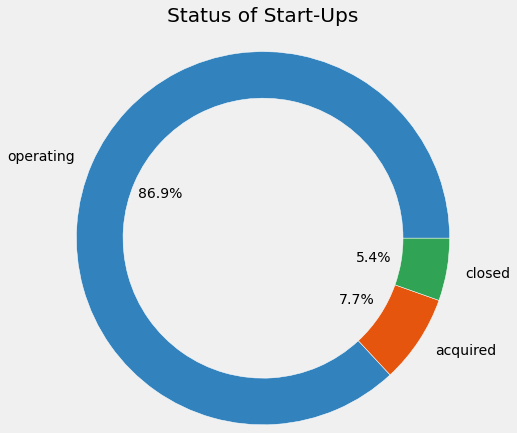

In [80]:
import numpy as np
status=data.status.value_counts()
plt.figure()

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
plt.pie(status.values, radius=2, colors=outer_colors,labels=status.index,autopct='%1.1f%%',
       wedgeprops=dict(width=0.5, edgecolor='w'))
plt.title('Status of Start-Ups',pad=100)
plt.show()

In [81]:
market=data.market.value_counts()
market[(market>1000)][0:10]
market=market[(market>1000)][0:10].to_frame()

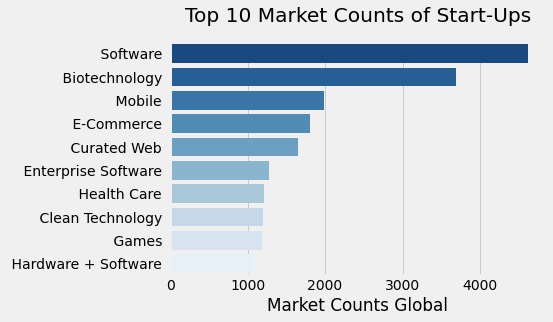

In [82]:
plt.figure()
ax1=sns.barplot(y=market.index,x=market.market,orient='h',palette='Blues_r')
ax1.set_title('Top 10 Market Counts of Start-Ups',pad=20)
ax1.set_xlabel('Market Counts Global')
plt.show()

In [83]:
market_con=data.groupby('country_code')['market'].value_counts().to_frame()

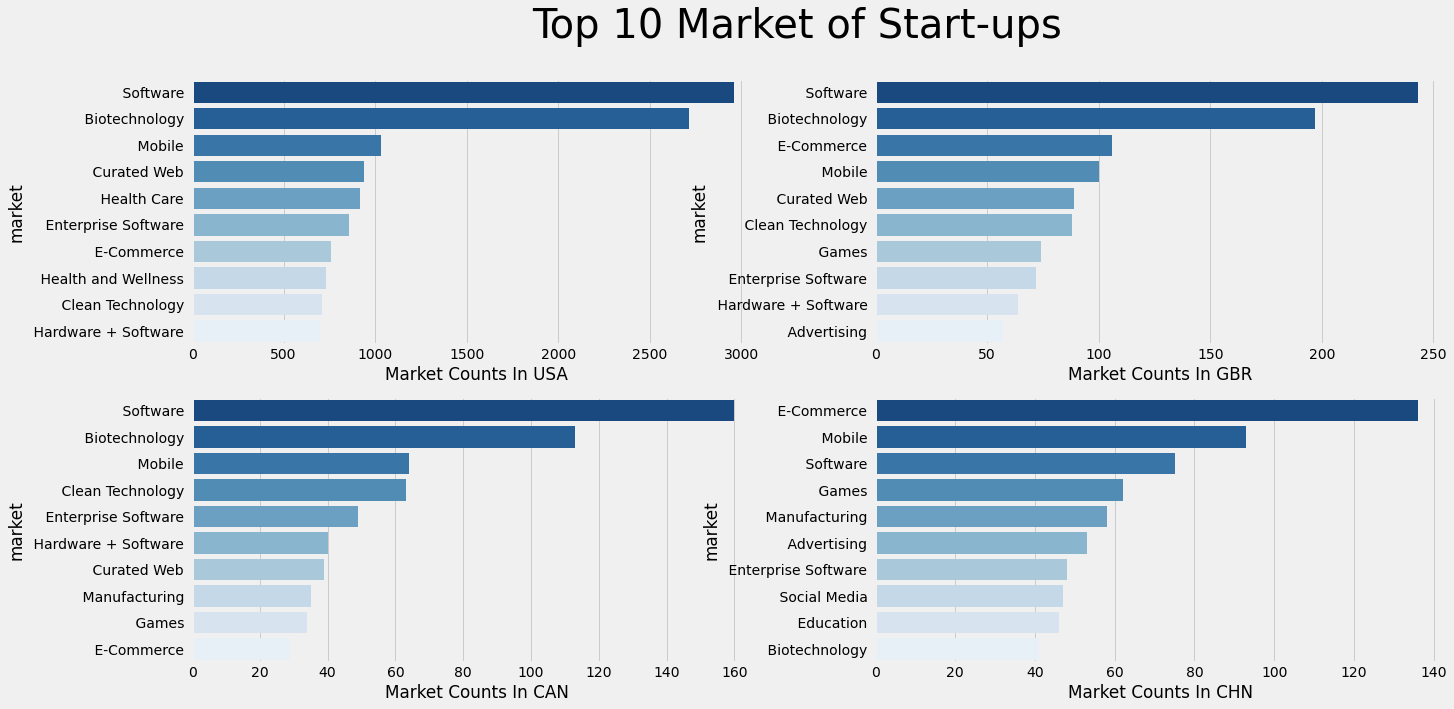

In [84]:
fig,axes=plt.subplots(2,2,figsize=(20,10))
cont=['USA','GBR','CAN','CHN']
for con,ax in zip(cont,range(1,5)):
    ax=plt.subplot(2,2,ax)
    ax=sns.barplot(y=market_con.loc[con].index[0:10],x=market_con.loc[con].market[0:10],orient='h',palette='Blues_r')
    ax.set_xlabel('Market Counts In {}'.format(con))
plt.suptitle('Top 10 Market of Start-ups',size=40)
plt.show()

In [85]:
top_markets=(data.market.value_counts()[data.market.value_counts()>24]).index
# We chose top markets to analyze,which are greater than 24 startups in that market.
sub_data=data[data.market.isin(top_markets)]

status_market_1=sub_data.groupby('market')['status'].value_counts(normalize=True).to_frame()
status_market_1.columns=['prop']
status_market_2=sub_data.groupby('market')['status'].value_counts().to_frame()
status_market_2.columns=['quantity']
status_market=pd.concat([status_market_1,status_market_2],axis=1)
status_market.reset_index()
status_market_closed=status_market.query('status=="closed"').reset_index(level=1)
status_market_closed.sort_values(by='prop',ascending=False)[0:10].style.background_gradient(cmap='Reds',subset=['prop']).set_caption('Markets that most start-ups closed')

,status,prop,quantity
market,,,
Public Relations,closed,0.204678,35
Coupons,closed,0.200000,7
VoIP,closed,0.172414,5
Facebook Applications,closed,0.169014,12
Location Based Services,closed,0.166667,10
Web Tools,closed,0.159091,7
iPhone,closed,0.156250,10
Curated Web,closed,0.155215,253
Social Network Media,closed,0.140351,24


In [86]:
status_market_closed.sort_values(by='prop',ascending=True)[0:10].style.background_gradient(cmap='Greens_r',subset=['prop']).set_caption('Markets that least start-ups closed')

,status,prop,quantity
market,,,
Medical,closed,0.007722,2
Technology,closed,0.007968,2
Consumer Electronics,closed,0.009259,1
Information Technology,closed,0.011236,1
Transportation,closed,0.012422,2
Services,closed,0.012658,1
Wireless,closed,0.013514,1
Telecommunications,closed,0.015152,1
Brand Marketing,closed,0.015152,1


In [87]:
status_market_acquired=status_market.query('status=="acquired"').reset_index(level=1)
status_market_acquired.sort_values(by='prop',ascending=False)[0:10].style.background_gradient(cmap='Blues',subset=['prop']).set_caption('Markets that most start-ups acquired')

,status,prop,quantity
market,,,
Chat,acquired,0.241379,7
Cloud Management,acquired,0.240000,6
Storage,acquired,0.232143,13
VoIP,acquired,0.206897,6
Web Hosting,acquired,0.193622,85
Wireless,acquired,0.189189,14
Semiconductors,acquired,0.179074,89
Video Streaming,acquired,0.174603,11
Security,acquired,0.171875,88


In [88]:
founded_year=data[~data.founded_year.isna()]['founded_year'].astype('int')

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3692.000000,2.013814,1.398832,1.000000,1.000000,2.000000,3.000000,15.000000
closed,2603.000000,1.434114,0.965478,1.000000,1.000000,1.000000,2.000000,11.000000
operating,41829.000000,1.689522,1.302072,1.000000,1.000000,1.000000,2.000000,18.000000


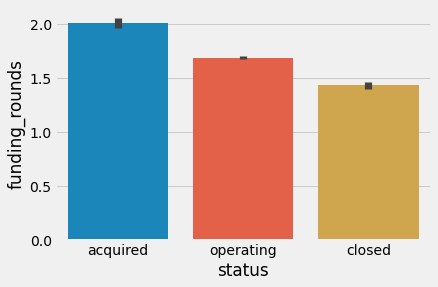

In [89]:
sns.barplot(data=data,x='status',y='funding_rounds')
data.groupby('status')['funding_rounds'].describe().style.highlight_max(subset=['max','75%','50%','std','mean'],color='lightgreen')

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3692.000000,2.013814,1.398832,1.000000,1.000000,2.000000,3.000000,15.000000
closed,2603.000000,1.434114,0.965478,1.000000,1.000000,1.000000,2.000000,11.000000
operating,41829.000000,1.689522,1.302072,1.000000,1.000000,1.000000,2.000000,18.000000


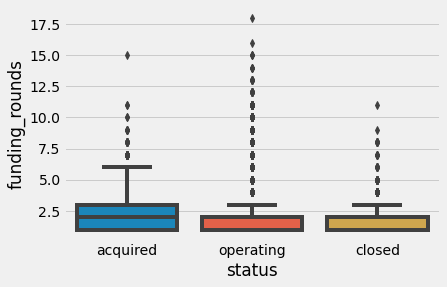

In [90]:
sns.boxplot(data=data,x='status',y='funding_rounds')
data.groupby('status')['funding_rounds'].describe().style.highlight_max(subset=['max','75%','50%','std','mean'],color='lightgreen')